w = [0.846, 0.3852]
b = -3.50108
f(x) = x2 = -2.196262x1+9.088993
f(x)- = x2 = -2.196262x1+11.685047
f(x)+ = x2 = -2.196262x1+6.492939

h(x) = -2.196262x1+9.088993-x2


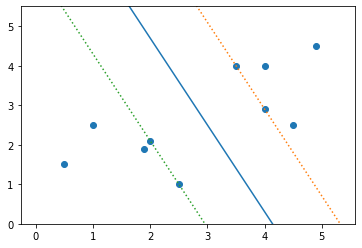

point x_6 has distance: -1.2498290534100407
point 3,3 has distance: 0.2071071521453788


In [1]:
import matplotlib.pyplot as plt
import numpy as np

x1s = [4,   4, 1,   2.5, 4.9, 1.9, 3.5, 0.5, 2,   4.5]
x2s = [2.9, 4, 2.5, 1,   4.5, 1.9, 4,   1.5, 2.1, 2.5]
ys = [1,1,-1,-1,1,-1,1,-1,-1,1]
lms = [0.414,0,0,0.018,0,0,0.018,0,0.414,0]
w=[0,0]
ab=0.0
for index in range(10):
    w[0] += lms[index]*ys[index]*x1s[index]
    w[1] += lms[index]*ys[index]*x2s[index]
for index in range(10):
    ab += ys[index]-(x1s[index]*w[0] + x2s[index]*w[1])
ab = ab/10
b = ys[0]-(x1s[0]*w[0] + x2s[0]*w[1])
print("w = ",end='')
print(w)
print("b = ",end='')
print(ys[0]-(x1s[0]*w[0] + x2s[0]*w[1]))
print("f(x) = x2 = %fx1+%f"%(-w[0]/w[1],-b/w[1]))
print("f(x)- = x2 = %fx1+%f"%(-w[0]/w[1],-(b-1)/w[1]))
print("f(x)+ = x2 = %fx1+%f"%(-w[0]/w[1],-(b+1)/w[1]))
print("\nh(x) = -2.196262x1+9.088993-x2")
samples = [(0,-(b)/(w[0])), (-(b)/w[1],0)]
samplesn = [(0,-(b-1)/(w[0])), (-(b-1)/w[1],0)]
samplesp = [(0,-(b+1)/(w[0])), (-(b+1)/w[1],0)]
plt.scatter(x1s,x2s)
plt.plot(samples[0],samples[1])
plt.plot(samplesn[0],samplesn[1], ls = ':')
plt.plot(samplesp[0],samplesp[1], ls = ':')
plt.ylim((0, 5.5))
plt.show()
print("point x_6 has distance: ",end='')
print((1.9*w[0]+1.9*w[1]+b)/np.sqrt(w[0]**2 + w[1]**2))
print("point 3,3 has distance: ",end='')
print((3*w[0]+3*w[1]+b)/np.sqrt(w[0]**2 + w[1]**2))

2) The SVM loss function with slack variables can be viewed as:

$\min_{\mathbf{w},b} \frac{ ||\mathbf{w}||^2}{2} + \gamma \sum_{i=1}^N \underbrace{\max(0, 1- y_i f(x_i))}_\text{Hinge loss}$

The hinge loss provides a way of dealing with datasets that are not separable.

a) Argue that $l = \max(0, 1-yw^\top x)$ is convex as a function of $w$.

$$
\\ \text{if } f''(x) \ge 0 \text{ for all } x \text{ in } I \text{ then } f(x) \text{ is convex.}
\\ \text{if each part of the max function is convex the whole function is convex}
\\ l''(w) = \frac{\partial}{\partial w}\frac{\partial}{\partial w} l =
\\ \frac{\partial}{\partial w} \frac{\partial}{\partial w} \max(0, 1-yw^\top x) =
\\ \frac{\partial}{\partial w} \frac{\partial}{\partial w} 0 \leq 0 \rightarrow 0 \leq 0 \rightarrow \text{True}
\\ \text{and}
\\ \frac{\partial}{\partial w} \frac{\partial}{\partial w} 1-yw^\top x \leq 0
\\ \frac{\partial}{\partial w} 0 - yx =
\\ 0 - 0 = 0 \rightarrow
\\ 0 \ge 0 \text{, Therefore } l \text{ is convex as a function of } w
$$

b) Suppose that for some $w$ we have a correct prediction of $f$ with $x_i$, i.e. $f(x_i) = \text{sgn}(w^\top x_i)$. For binary classifications ($y_i = +1/-1$), what range of values can the hinge loss, $l$, take on this correctly classified example? Points which are classified correctly and
which have non-zero hinge loss are referred to as margin mistakes.
$$
\\ l=\{^{1, \text{ if } w^\top x_i = 0}_{0, \text{ otherwise}}
\\ Range(\sum_{i=1}^N \underbrace{\max(0, 1- y_i f(x_i)))}_l = [0,N]
\\\frac{ ||\mathbf{w}||^2}{2} + \gamma \times [0,N] =
\\ [\frac {||w||^2} 2, \lambda N+\frac {||w||^2} 2]
\\ \text{final answer = } l = \mathbb{R} \in [0,1]
$$

c) Let $M(w)$ be the number of mistakes made by $w$ on our dataset (in terms of classification loss). Show that:
$$\frac{1}{n}M(w) \leq \frac{1}{n}\sum_{i=1}^n \max(0, 1- y_i w^\top x_i)$$

In other words, the average hinge loss on our dataset is an upper bound on the average number of mistakes we make on our dataset.
$$
\\ \frac{1}{n}M(w) \leq \frac{1}{n}\sum_{i=1}^n \max(0, 1- y_i w^\top x_i) =
\\ M(w) \leq \sum_{i=1}^n \max(0, 1- y_i w^\top x_i) =
\\ \sum_{i=1}^n |y_i - \text{sgn}(w^\top x_i)| \leq \sum_{i=1}^n \max(0, 1- y_i w^\top x_i) =
\\ z \leq 2z, \text{let } z=\mathbb{R} \in [0,N]
\\ \text{when there is an incorrect sample prediction mistakes will increase by 1 and loss will increase by 2}
\\ \text{when there is a correct sample prediction both the loss and number of mistakes increase by 0}
\\ \text{the number of (in)corrrect predictions are the same because both use the same set of samples}
$$